In [2]:
import numpy as np
import cv2
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as model
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# 1. 보스턴 주택 가격 데이타셋 불러오기
boston = datasets.load_boston()

In [6]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [8]:
boston.data.shape

(506, 13)

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston.target # boston 지역 주택 가격

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [13]:
# 모델 훈련
# cv 함수 선형 회귀 잘 못함.
# scikit learn 이용하기

linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model.train_test_split(boston.data, boston.target, test_size=0.1, random_state=42)

In [15]:
# scikit-learn fit 함수
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.73948415423661

In [20]:
# scikit-learn : score(r2 결정계수)
linreg.score(X_train, y_train)

0.7374934091901197

In [21]:
# 모델 테스트
y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

15.010997321630335

Text(0,0.5,'target value')

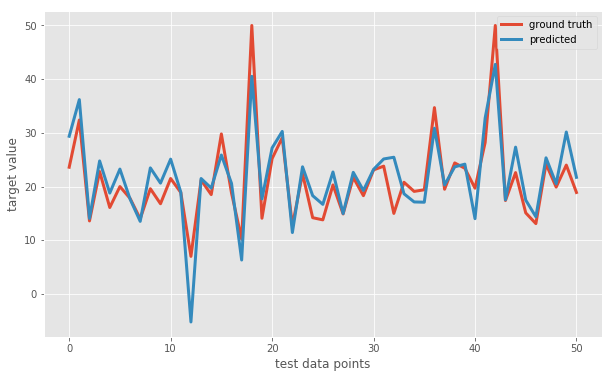

In [26]:
# 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted', )

plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-5,45,'MSE = 15.011')

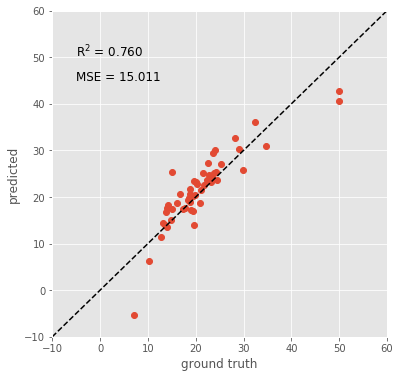

In [39]:
# r2 계수 이용
plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10,60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

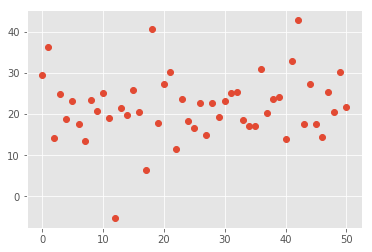

In [44]:
plt.plot(y_pred, 'o')

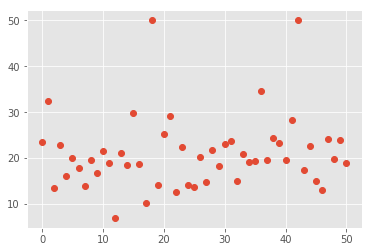

In [46]:
plt.plot(y_test, 'o')

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9]
[29.36783893 36.19515051 14.06394347 24.77329888 18.78901706 23.2524097
 17.67763556 13.5200901  23.48015817 20.64079005 25.10416587 18.95702671
 -5.21685346 21.49906598 19.7092099  25.87410066 20.59095276  6.31929264
 40.53171352 17.70217091 27.18617478 30.26722839 11.43480888 23.67802086
 18.30325617 16.68400622 22.71208903 14.96430789 22.64409855 19.26605652
 23.19388916 25.14029507 25.45984169 18.65461236 17.13639047 17.08525527
 30.86403734 20.30895289 23.66652421 24.1725578  14.01965844 32.76263916
 42.75575999 17.53054006 27.34102504 17.47762011 14.37387908 25.35218842
 20.51506228 30.15965716 21.721659  ]


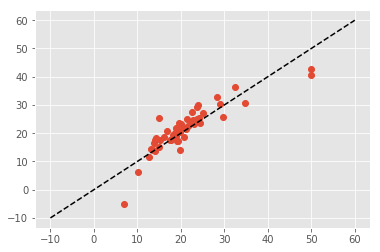

In [57]:
print(y_test)
print(y_pred)
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
#plt.axis([-10,60, -10, 60])

[-10, 60, -10, 60]

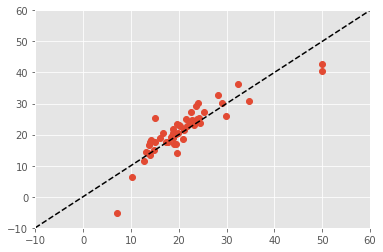

In [59]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10,60, -10, 60])